# Dataset Description
This dataset contains census data regarding a number of characteristics about citizens, an whether or not they make more than $50 000 a year.

# Data Attributes:
The main data that I will be analysing is data in relation to family status, including relationship, marital status, race, sex, native country.

# Data Analysis

Research question: Does the family makeup of each citizen who took the census affect earnings?

 # Importing File

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/adult.data")
df

,age,education-num,marital-status,relationship,sex,workclass,capital-gain,capital-loss,native-country,age,education,fnlwgt,hours-per-week,occupation,race
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns = ['age',  'workclass','fnlwgt', 'education','education-num','marital-status','occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss' ,  'hours-per-week','native-country', 'salary' ]

# Cleaning

In [5]:
df.dropna(axis=0)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df_clean2 = (df.drop(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'occupation', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1))

In [7]:
df_clean2['salary'] = pd.factorize(df['salary'])[0]
df_clean2

,marital-status,relationship,race,sex,native-country,salary
0,Never-married,Not-in-family,White,Male,United-States,0
1,Married-civ-spouse,Husband,White,Male,United-States,0
2,Divorced,Not-in-family,White,Male,United-States,0
3,Married-civ-spouse,Husband,Black,Male,United-States,0
4,Married-civ-spouse,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...
32556,Married-civ-spouse,Wife,White,Female,United-States,0
32557,Married-civ-spouse,Husband,White,Male,United-States,1
32558,Widowed,Unmarried,White,Female,United-States,0
32559,Never-married,Own-child,White,Male,United-States,0


This makes it easier to use the 'salary' column in many types of vizualizations, we dropped empty values, and dropped columns that are unrelated to my research question.

# Finding the most Common Response Within the data

In [7]:
from scipy import stats
a = np.array(df["marital-status"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' Married-civ-spouse'], dtype=object), count=array([14976]))


In [8]:
from scipy import stats
a = np.array(df["relationship"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' Husband'], dtype=object), count=array([13193]))


In [9]:
from scipy import stats
a = np.array(df["sex"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' Male'], dtype=object), count=array([21790]))


In [10]:
from scipy import stats
a = np.array(df["native-country"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' United-States'], dtype=object), count=array([29170]))


The above infomation tells that in the census, the most common arital status was married to a civil spouce, the most common standing in a relationship is as a husband, there were more males who answered the survey, and that the most people were United States Natives.

# Comparing Data Between Salary Groups

 Making multiple data sets to compare to one another is what makes the data useful to answer the research question.

In [12]:
df2 = df_clean2[df_clean2['salary'] < .5 ] #less than 50k
df3 = df_clean2[df_clean2['salary'] >.5 ] # more than 50k


Plotting all of df, df1, and df2

Text(0.5, 1.0, 'Familial Status of Citizens')

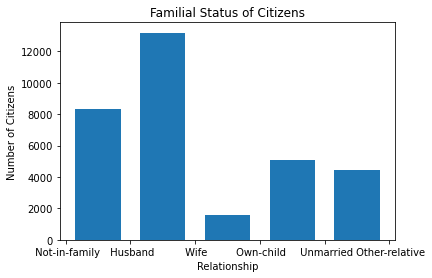

In [23]:
fig = plt.hist(df_clean2['relationship'], bins=5, rwidth=.7)
plt.xlabel('Relationship')
plt.ylabel('Number of Citizens')
plt.title('Familial Status of Citizens')

In all of the data, this is the distribution as to how the person related to their family- in both earning categories combines, the most common result is husband, which varies when regarding them seperatly.

Text(0.5, 1.0, 'Number of Citizens Familial Status Under 50k')

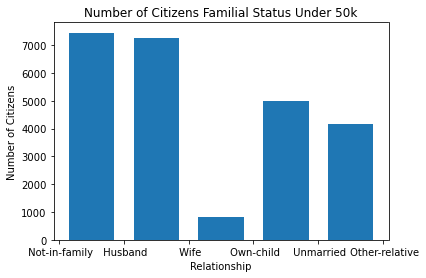

In [22]:
fig = plt.hist(df2['relationship'], bins=5, rwidth=.7)
plt.xlabel('Relationship')
plt.ylabel('Number of Citizens')
plt.title('Number of Citizens Familial Status Under 50k')

This visualization shows a distribution of under 50k household's main earners

Text(0.5, 1.0, 'Number of Citizens and Familial Status Over 50k')

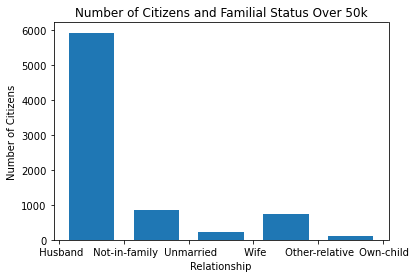

In [21]:
fig = plt.hist(df3['relationship'], bins=5, rwidth=.7)
plt.xlabel('Relationship')
plt.ylabel('Number of Citizens')
plt.title('Number of Citizens and Familial Status Over 50k')

This data shows that in the majority of households making over 50k, it is a family, with the husband being the earner.

In [8]:
df_clean2.to_csv(f"../data/processed/analysis2.csv", index=None)

Text(0.5, 1.0, 'Distribution of Marriage Relationships')

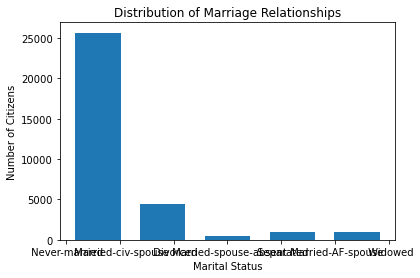

In [26]:
fig = plt.hist(df_clean2['marital-status'], bins=5, rwidth=.7)
plt.xlabel('Marital Status')
plt.ylabel('Number of Citizens')
plt.title('Distribution of Marriage Relationships')

This is the distribution of marital statuses within the data

Text(0.5, 1.0, 'Distribution of Marriage Relationships for Earners Under 50k')

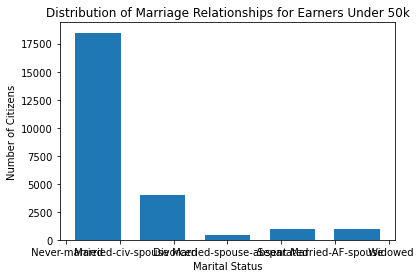

In [28]:
fig = plt.hist(df2['marital-status'], bins=5, rwidth=.7)
plt.xlabel('Marital Status')
plt.ylabel('Number of Citizens')
plt.title('Distribution of Marriage Relationships for Earners Under 50k')

This shows that the majority of the under 50k earners are not married.

Text(0.5, 1.0, 'Distribution of Marriage Relationships for Over 50k Earners')

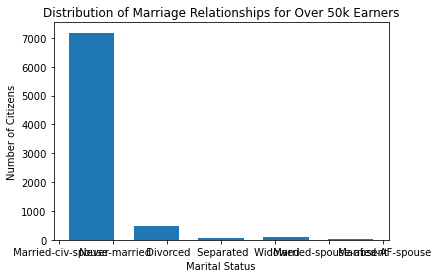

In [29]:
fig = plt.hist(df3['marital-status'], bins=5, rwidth=.7)
plt.xlabel('Marital Status')
plt.ylabel('Number of Citizens')
plt.title('Distribution of Marriage Relationships for Over 50k Earners')

This shows a correlation that earners of over 50k are married and live with their spouse.

# Results

According to the preliminary analysis of the information, as well as some visualisations, it appears that there is some correlation between the family status and earnings, though without further information, it is hard to tell if there is cause involved and if so, which caused the other. According to these visualisations, there is a trend that a majority of the 50k or more earners are husbands in a spousal relationship, where the under 50k earners have a bit more variation in the family makeup, with a trend towards 'Not in Family'. The trend is quite obvious within marital status as well, with a vast majority of <50k earners (as well as total census) being never married. For >50k earners, it is skewed towards civil spousal relationship, which makes sense, considering the "Relationship" results.